In [2]:
import os, sys
import numpy as np
import healpy as hp
import pandas as pd
import h5py
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

os.system('module load texlive/2022')

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times",
    "font.size"  : 13
})

matplotlib.rcParams.update({'font.size': 15})

matplotlib.rcParams['mathtext.fontset'] = 'stix'
plt.rc('text.latex', preamble=r'\usepackage{/global/cfs/cdirs/lsst/groups/WL/users/yomori/repo/nulltests_txpipe/apjfonts}')
        
#plt.rcParams["font.family"] = "Times New Roman"

plt.rcParams['axes.facecolor']   = 'w'
plt.rcParams['figure.facecolor'] = 'w'


kidscol = '#9CC363'    # light olive
descol  = 'chocolate'  # dark orange
hsccol  = '#5A8BAF'    # lightpurple

Lmod has detected the following error: The following module(s) are unknown:
"texlive/2022"

Please check the spelling or version number. Also try "module spider ..."
It is also possible your cache file is out-of-date; it may help to try:
  $ module --ignore_cache load "texlive/2022"

Also make sure that all modulefiles written in TCL start with the string
#%Module





In [3]:
# PSF catalogs for each survey can be found here at NERSC:
desy3_s = h5py.File('/global/cfs/cdirs/lsst/groups/WL/projects/txpipe-sys-tests/des-y3/DES_psf_y3_catalog.hdf5','r')
hscy3_s = h5py.File('/global/cfs/cdirs/lsst/groups/WL/projects/txpipe-sys-tests/hsc-y3/star/catalog/txpipe_allfield_star_nosnrcut.h5','r')
kids_s = h5py.File('/global/cfs/cdirs/lsst/groups/WL/projects/txpipe-sys-tests/kids/kids1000_psf_catalog.h5','r')

<Figure size 640x480 with 0 Axes>

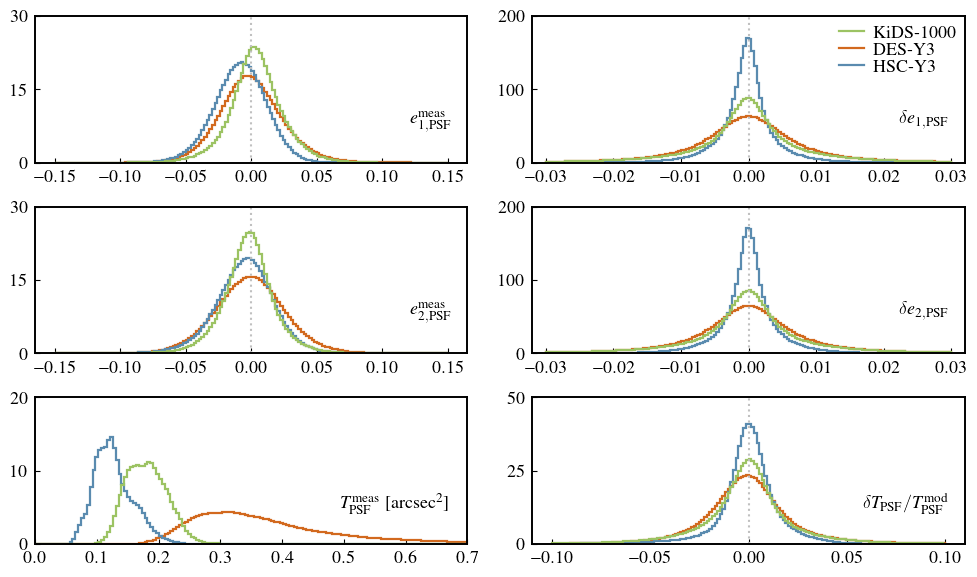

In [4]:
%matplotlib inline

matplotlib.rcParams.update({'font.size': 13})
plt.clf()
fig = plt.figure(figsize=(10,6),dpi=100)
gs  = gridspec.GridSpec(3, 2, top=0.98, right=0.98, left=0.05, bottom=0.1,hspace=0.3, wspace=0.15)
ax0 = plt.subplot(gs[0])
ax0.hist((desy3_s['stars/measured_e1'][:]),bins=150,range=[-0.15,0.15],histtype='step',color=descol,density=True,lw=1.6)
ax0.hist((hscy3_s['stars/measured_e1'][:]),bins=150,range=[-0.15,0.15],histtype='step',color=hsccol,density=True,lw=1.6)
ax0.hist((kids_s['stars/measured_e1'][:]),bins=150,range=[-0.15,0.15],histtype='step',color=kidscol,density=True,lw=1.6)

ax0.set_ylim(0,30)
ax0.text(0.96,0.35,r'$e_{1, {\rm PSF}}^{\rm meas}$',transform=ax0.transAxes,ha='right',va='top',size=13)
ax0.tick_params(axis="both",which='both',direction="in")
ax0.tick_params(axis='both', which='major', pad=5)
ax0.set_yticks([0,15,30])
ax0.plot([0,0], [0,30], ls=':', color='silver')

ax1 = plt.subplot(gs[1])
ax1.hist((desy3_s['stars/measured_e1'][:]- desy3_s['stars/model_e1'][:]),bins=150,range=[-0.03,0.03],histtype='step',color=descol,density=True,lw=1.6)
ax1.hist((hscy3_s['stars/measured_e1'][:]- hscy3_s['stars/model_e1'][:]),bins=150,range=[-0.03,0.03],histtype='step',color=hsccol,density=True,lw=1.6)
ax1.hist((kids_s['stars/measured_e1'][:]- kids_s['stars/model_e1'][:]),bins=150,range=[-0.03,0.03],histtype='step',color=kidscol,density=True,lw=1.6)
ax1.plot(np.linspace(-1000,-1001,3),color=kidscol,lw=1.6,label='KiDS-1000')
ax1.plot(np.linspace(-1000,-1001,3),color=descol,lw=1.6,label='DES-Y3')
ax1.plot(np.linspace(-1000,-1001,3),color=hsccol,lw=1.6,label='HSC-Y3')
ax1.set_xlim(-0.032,0.032)
ax1.set_ylim(0,200)
ax1.legend(frameon=False,loc = 'upper right', labelspacing=0.03,ncol=1,handletextpad=0.5,columnspacing=0.2,handlelength=1.4,borderaxespad=0.1)
ax1.text(0.96,0.35,r'$\delta e_{1, {\rm PSF}}$',transform=ax1.transAxes,ha='right',va='top',size=13)
ax1.tick_params(axis="both",which='both',direction="in")
ax1.tick_params(axis='both', which='major', pad=5)
ax1.set_yticks([0,100,200])
ax1.plot([0,0], [0,200], ls=':', color='silver')

ax2 = plt.subplot(gs[2])
ax2.hist((desy3_s['stars/measured_e2'][:]),bins=150,range=[-0.15,0.15],histtype='step',color=descol,density=True,lw=1.6)
ax2.hist((-hscy3_s['stars/measured_e2'][:]),bins=150,range=[-0.15,0.15],histtype='step',color=hsccol,density=True,lw=1.6)
ax2.hist((kids_s['stars/measured_e2'][:]),bins=150,range=[-0.15,0.15],histtype='step',color=kidscol,density=True,lw=1.6)
ax2.set_ylim(0,30)
ax2.text(0.96,0.35,r'$e_{2, {\rm PSF}}^{\rm meas}$',transform=ax2.transAxes,ha='right',va='top',size=13)
ax2.tick_params(axis="both",which='both',direction="in")
ax2.tick_params(axis='both', which='major', pad=5)
ax2.set_yticks([0,15,30])
ax2.plot([0,0], [0,100], ls=':', color='silver')


ax3 = plt.subplot(gs[3])
ax3.hist((desy3_s['stars/measured_e2'][:]- desy3_s['stars/model_e2'][:]),bins=150,range=[-0.03,0.03],histtype='step',color=descol,density=True,lw=1.6)
ax3.hist((-hscy3_s['stars/measured_e2'][:]+ hscy3_s['stars/model_e2'][:]),bins=150,range=[-0.03,0.03],histtype='step',color=hsccol,density=True,lw=1.6)
ax3.hist((kids_s['stars/measured_e2'][:]- kids_s['stars/model_e2'][:]),bins=150,range=[-0.03,0.03],histtype='step',color=kidscol,density=True,lw=1.6)
ax3.set_xlim(-0.032,0.032)
ax3.set_ylim(0,200)
ax3.text(0.96,0.35,r'$\delta e_{2, {\rm PSF}}$',transform=ax3.transAxes,ha='right',va='top',size=13)
ax3.tick_params(axis="both",which='both',direction="in")
ax3.tick_params(axis='both', which='major', pad=5)
ax3.set_yticks([0,100,200])
ax3.plot([0,0], [0,200], ls=':', color='silver')

ax4 = plt.subplot(gs[4])
ax4.hist(desy3_s['stars/measured_T'][:],bins=150,range=[0,0.7],histtype='step',color=descol,density=True,lw=1.6)
ax4.hist(hscy3_s['stars/measured_T'][:],bins=150,range=[0,0.7],histtype='step',color=hsccol,density=True,lw=1.6)
ax4.hist(kids_s['stars/measured_T'][:],bins=150,range=[0,0.7],histtype='step',color=kidscol,density=True,lw=1.6)
ax4.set_xlim(0,0.7)
ax4.set_ylim(0,20)
ax4.text(0.96,0.35,r'$T_{\rm PSF}^{\rm meas}$ [arcsec$^2$]',transform=ax4.transAxes,ha='right',va='top',size=13)
ax4.tick_params(axis="both",which='both',direction="in")
ax4.tick_params(axis='both', which='major', pad=5)
ax4.set_yticks([0,10,20])

ax5 = plt.subplot(gs[5])
ax5.hist((desy3_s['stars/measured_T'][:]- desy3_s['stars/model_T'][:])/desy3_s['stars/model_T'][:],bins=150,range=[-0.1,0.1],histtype='step',color=descol,density=True,lw=1.6)
ax5.hist((hscy3_s['stars/measured_T'][:]- hscy3_s['stars/model_T'][:])/hscy3_s['stars/model_T'][:],bins=150,range=[-0.1,0.1],histtype='step',color=hsccol,density=True,lw=1.6)
ax5.hist((kids_s['stars/measured_T'][:]- kids_s['stars/model_T'][:])/kids_s['stars/model_T'][:],bins=150,range=[-0.1,0.1],histtype='step',color=kidscol,density=True,lw=1.6)
ax5.set_xlim(-0.11,0.11)
ax5.set_ylim(0,50)
ax5.text(0.96,0.35,r'$\delta T_{\rm PSF}/ T_{\rm PSF}^{\rm mod}$',transform=ax5.transAxes,ha='right',va='top',size=13)
ax5.tick_params(axis="both",which='both',direction="in")
ax5.tick_params(axis='both', which='major', pad=5)
ax5.set_yticks([0,25,50])
ax5.plot([0,0], [0,50], ls=':', color='silver')


for axis in ['top','bottom','left','right']:
    ax0.spines[axis].set_linewidth(1.4)
    ax1.spines[axis].set_linewidth(1.4)
    ax2.spines[axis].set_linewidth(1.4)
    ax3.spines[axis].set_linewidth(1.4)
    ax4.spines[axis].set_linewidth(1.4)
    ax5.spines[axis].set_linewidth(1.4)


plt.savefig('psf_histograms_v2.pdf',dpi=200)

In [8]:
from scipy.stats import kurtosis

In [10]:
diffe1kids = kids_s['stars/measured_e1'][:]- kids_s['stars/model_e1'][:]
diffe2kids = kids_s['stars/measured_e2'][:]- kids_s['stars/model_e2'][:]

diffe1des = desy3_s['stars/measured_e1'][:]- desy3_s['stars/model_e1'][:]
diffe2des = desy3_s['stars/measured_e2'][:]- desy3_s['stars/model_e2'][:]

diffe1hsc = hscy3_s['stars/measured_e1'][:]- hscy3_s['stars/model_e1'][:]
diffe2hsc = -hscy3_s['stars/measured_e2'][:]+ hscy3_s['stars/model_e2'][:]
chk = hscy3_s['stars/measured_e2'][:]-hscy3_s['stars/model_e2'][:]

print("KiDS de1: ", kurtosis(diffe1kids[(-0.03<diffe1kids)&(diffe1kids>0.03)]))
print("DES de1: ", kurtosis(diffe1des[(-0.03<diffe1des)&(diffe1des>0.03)]))
print("HSC de1: ", kurtosis(diffe1hsc[(-0.03<diffe1hsc)&(diffe1hsc>0.03)]))

print("KiDS de2: ", kurtosis(diffe2kids[(-0.03<diffe2kids)&(diffe2kids>0.03)]))
print("DES de2: ", kurtosis(diffe2des[(-0.03<diffe2des)&(diffe2des>0.03)]))
print("HSC de2: ", kurtosis(diffe2hsc[(-0.03<diffe2hsc)&(diffe2hsc>0.03)]))

print("KiDS dt/t: ", kurtosis((kids_s['stars/measured_T'][:]- kids_s['stars/model_T'][:]/kids_s['stars/model_T'][:])))
print("DES dt/t: ", kurtosis((desy3_s['stars/measured_T'][:]- desy3_s['stars/model_T'][:]/desy3_s['stars/model_T'][:])))
print("HSC dt/t: ", kurtosis(hscy3_s['stars/measured_T'][:]- hscy3_s['stars/model_T'][:]/hscy3_s['stars/model_T'][:]))



KiDS de1:  5.787560076403949
DES de1:  4.823331082599471
HSC de1:  48.10389999583734
KiDS de2:  5.113385838663147
DES de2:  4.894376629990633
HSC de2:  55.91687321566484
KiDS dt/t:  -0.10731614921188859
DES dt/t:  4.118006451259173
HSC dt/t:  0.5808748666337413


In [11]:
from scipy.stats import skew

print("KiDS de1: ", skew(diffe1kids[(-0.03<diffe1kids)&(diffe1kids>0.03)]))
print("DES de1: ", skew(diffe1des[(-0.03<diffe1des)&(diffe1des>0.03)]))
print("HSC de1: ", skew(diffe1hsc[(-0.03<diffe1hsc)&(diffe1hsc>0.03)]))

print("KiDS de2: ", skew(diffe2kids[(-0.03<diffe2kids)&(diffe2kids>0.03)]))
print("DES de2: ", skew(diffe2des[(-0.03<diffe2des)&(diffe2des>0.03)]))
print("HSC de2: ", skew(diffe2hsc[(-0.03<diffe2hsc)&(diffe2hsc>0.03)]))

print("KiDS dt/t: ", skew((kids_s['stars/measured_T'][:]- kids_s['stars/model_T'][:]/kids_s['stars/model_T'][:])))
print("DES dt/t: ", skew((desy3_s['stars/measured_T'][:]- desy3_s['stars/model_T'][:]/desy3_s['stars/model_T'][:])))
print("HSC dt/t: ", skew(hscy3_s['stars/measured_T'][:]- hscy3_s['stars/model_T'][:]/hscy3_s['stars/model_T'][:]))

KiDS de1:  1.9458778949270616
DES de1:  1.933450677428919
HSC de1:  6.4815325416862795
KiDS de2:  1.896144056506325
DES de2:  1.9401157904406898
HSC de2:  6.5713836756309005
KiDS dt/t:  0.32055112225309207
DES dt/t:  1.729210881177948
HSC dt/t:  0.6226815223861467


In [12]:
print("KiDS de1: ", np.mean(diffe1kids[(-0.03<diffe1kids)&(diffe1kids>0.03)]))
print("DES de1: ", np.mean(diffe1des[(-0.03<diffe1des)&(diffe1des>0.03)]))
print("HSC de1: ", np.mean(diffe1hsc[(-0.03<diffe1hsc)&(diffe1hsc>0.03)]))

print("KiDS de2: ", np.mean(diffe2kids[(-0.03<diffe2kids)&(diffe2kids>0.03)]))
print("DES de2: ", np.mean(diffe2des[(-0.03<diffe2des)&(diffe2des>0.03)]))
print("HSC de2: ", np.mean(diffe2hsc[(-0.03<diffe2hsc)&(diffe2hsc>0.03)]))

print("KiDS dt/t: ", np.mean((kids_s['stars/measured_T'][:]- kids_s['stars/model_T'][:]/kids_s['stars/model_T'][:])))
print("DES dt/t: ", np.mean((desy3_s['stars/measured_T'][:]- desy3_s['stars/model_T'][:]/desy3_s['stars/model_T'][:])))
print("HSC dt/t: ", np.mean(hscy3_s['stars/measured_T'][:]- hscy3_s['stars/model_T'][:]/hscy3_s['stars/model_T'][:]))

KiDS de1:  0.038936991537621264
DES de1:  0.03991108016453593
HSC de1:  0.04314383
KiDS de2:  0.03886636551616263
DES de2:  0.039848977689437994
HSC de2:  0.043336913
KiDS dt/t:  -0.8191649722692873
DES dt/t:  -0.6150664270244502
HSC dt/t:  -0.87261873
